In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties

In [2]:
# 设置中文字体
font_path = 'C:/Windows/Fonts/simhei.ttf'  # 黑体字体路径，可以根据需要修改
font_prop = FontProperties(fname=font_path)

In [3]:
%matplotlib inline

In [4]:
def read_and_process_dat_file(filename, delimiter=' ', normalization_threshold=6585):
    """
    读取.dat文件，将数据转换为2D数组，进行最大值归一化，并进行阈值截断。

    参数:
    filename (str): .dat文件路径。
    delimiter (str): 文件中的数据分隔符。默认为空格。
    normalization_threshold (float): 用于截断数据的阈值。默认值为6585。

    返回:
    numpy.ndarray: 处理后的2D数组。
    """
    # 读取文件并分割每行的数据
    with open(filename, 'r') as file:
        lines = file.readlines()
        # 去除每行末尾的换行符，并分割数据
        data_list = [line.strip().split(delimiter) for line in lines if line.strip()]
        # 将分割后的字符串转换为浮点数
        data_array = np.array([[float(num) for num in row] for row in data_list])
    
    # 对 data[:, 1:] 进行最大值归一化
    max_vals = np.max(data_array[:, 1:], axis=0)  # 找到每列的最大值
    data_array[:, 1:] = data_array[:, 1:] / max_vals  # 对每列进行归一化
    
    # 根据阈值进行截断
    data_array = data_array[data_array[:, 0] <= normalization_threshold]
    
    return data_array

# 示例使用
file1 = 'MnCO3.dat'  # 替换为你的.dat文件路径
data = read_and_process_dat_file(file1)

# 打印数据形状（行数和列数）
print(f"The data has {data.shape[0]} rows and {data.shape[1]} columns.")

The data has 360 rows and 141 columns.


The data has 360 rows and 2 columns.
The data has 360 rows and 2 columns.


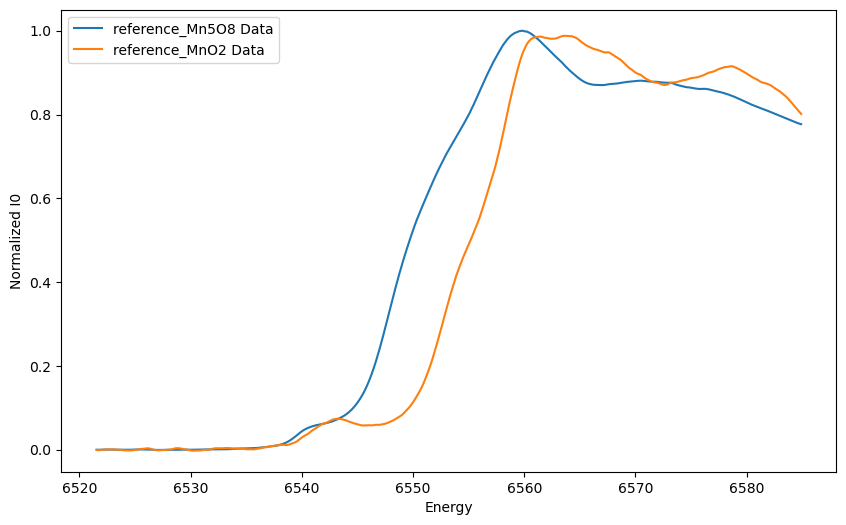

In [5]:
# 提取参考光谱Mn5O8
file2 = 'Mn5O8.dat'  # 替换为你的.dat文件路径
file3 = 'MnO2.dat'
reference_Mn5O8 = read_and_process_dat_file(file2)
reference_MnO2  = read_and_process_dat_file(file3)

# 打印数据形状（行数和列数）
print(f"The data has {reference_Mn5O8.shape[0]} rows and {reference_Mn5O8.shape[1]} columns.")
print(f"The data has {reference_MnO2.shape[0]} rows and {reference_MnO2.shape[1]} columns.")

# 绘制插值后的曲线
plt.figure(figsize=(10, 6))
plt.plot(reference_Mn5O8[:,0], reference_Mn5O8[:,1], label='reference_Mn5O8 Data')
plt.plot(reference_MnO2[:,0], reference_MnO2[:,1], label='reference_MnO2 Data')
plt.xlabel('Energy')
plt.ylabel('Normalized I0')
plt.legend()
plt.show()

In [6]:
# 参考谱的获取
import utils

filename = 'Manganese (IV) Oxide_id0eue76.dat'  # 替换为你的.dat文件路径
energy_range = data[:, 0]
# reference_MnO2 = utils.get_data(filename, energy_range)
reference_MnCO3 = data[:, :2] # 取第一张作为reference_MnCO3
reference_Mn2O3 = np.column_stack((data[:, 0], data[:, -1])) # 取最后一张作为reference_Mn2O3

In [7]:
# 提取需要降维的数据
X = data[:, 1:]

# 使用PCA进行降维
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X.T).T

# 打印降维后的数据形状
print(X_reduced.shape)  # 输出应为 (3, 140)

(3, 140)


In [8]:
# 转置数据，使得每列成为一个时间序列
X_time_series = X_reduced.T
print(X_time_series.shape)

# 应用 K-means 聚类
n_clusters = 4
kmeans = KMeans(n_clusters, random_state=0)  # 可以根据需要调整聚类数目
labels = kmeans.fit_predict(X_time_series)
print(labels)

# 定义映射关系
label_map = {1: 0, 2: 1, 0: 2, 3: 3}
# 使用映射关系重新排列标签
labels = np.vectorize(label_map.get)(labels)

# 获取聚类标签的颜色映射
colors = list(mcolors.TABLEAU_COLORS.values())

# 定义聚类标签对应的颜色映射
def get_color(label):
    return colors[label % len(colors)]
    

(140, 3)


D:\software\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\software\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


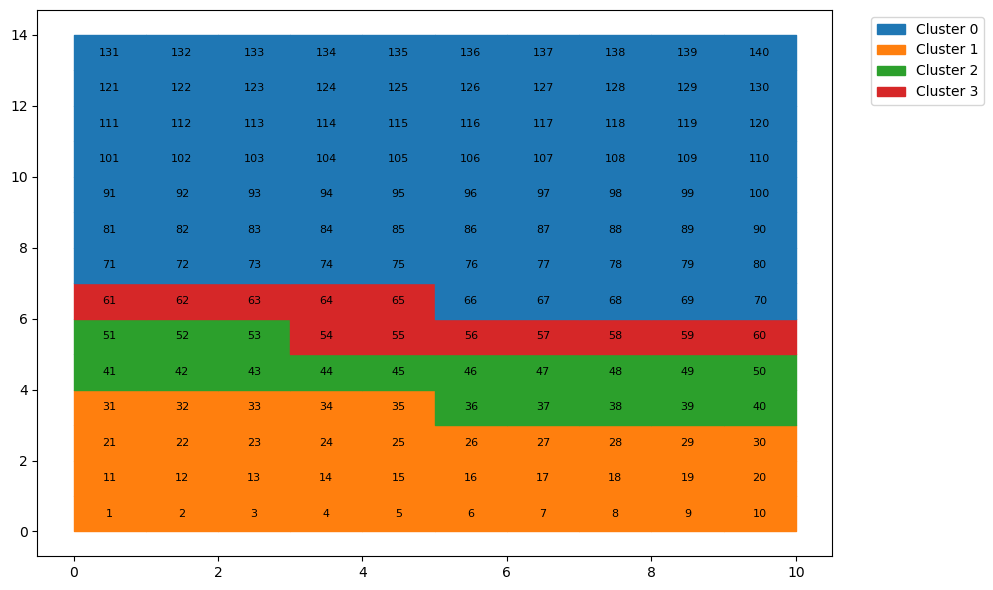

In [9]:
# 创建方格图
plt.figure(figsize=(10, 6))

# 绘制每个时间序列的方格，根据聚类标签上色
for i in range(len(X_time_series)):
    label_color = get_color(labels[i])
    row = i // 10
    col = i % 10
    plt.text(col + 0.5, row + 0.5, str(i+1), ha='center', va='center', fontsize=8)
    plt.fill_between([i % 10, (i % 10) + 1], (i // 10), (i // 10) + 1, color=label_color)

# 创建按照聚类标签顺序显示的图例
legend_labels = np.unique(labels)
# 根据需求调整legend_labels对应的图例顺序
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=get_color(l), label=f'Cluster {l}') for l in np.unique(labels)]

# 显示图例
plt.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(1.2, 1))
# 显示图形
plt.tight_layout()
plt.show()

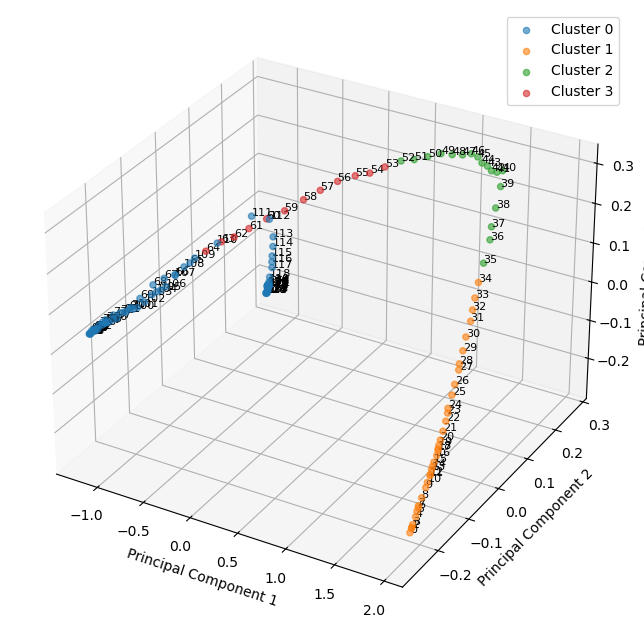

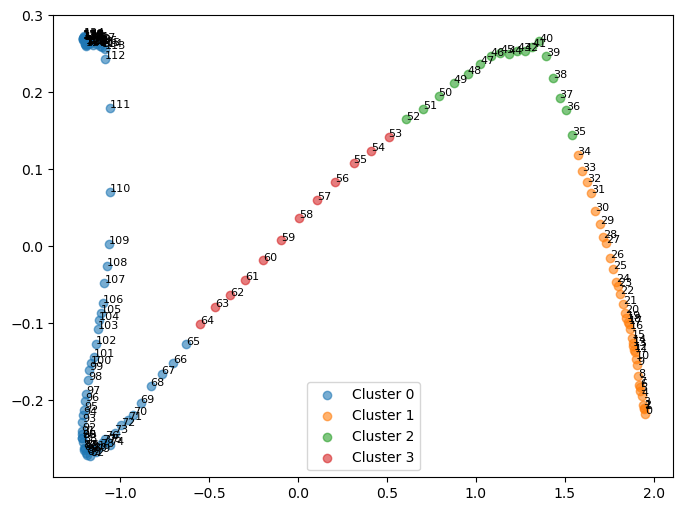

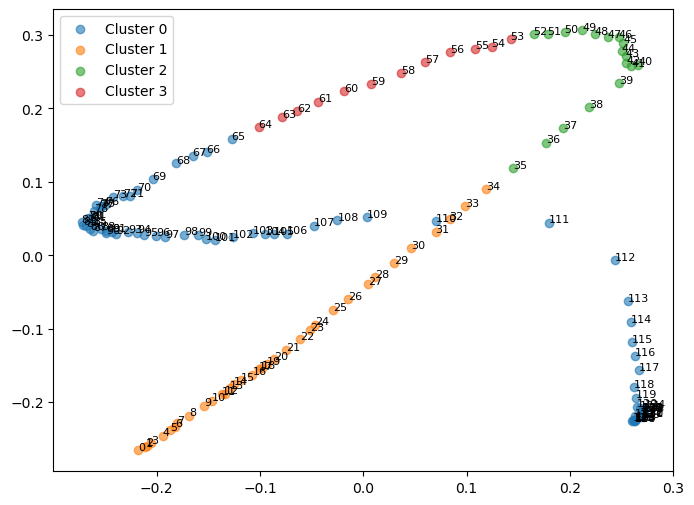

In [10]:
# 创建三维图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# 根据聚类标签绘制数据点，并标记索引
for label in np.unique(labels):
    indices = np.where(labels == label)
    ax.scatter(X_time_series[indices, 0], X_time_series[indices, 1], X_time_series[indices, 2], label=f'Cluster {label}', alpha=0.6)
# 添加坐标轴标签
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
# 添加每个数据点的索引标记
for i in range(len(X_time_series)):
    ax.text(X_time_series[i, 0], X_time_series[i, 1], X_time_series[i, 2], str(i), color='black', fontsize=8)
# 添加图例
ax.legend()

# 创建二维图形
plt.figure(figsize=(8, 6))
# 根据聚类标签绘制数据点，并标记索引
for label in np.unique(labels):
    indices = np.where(labels == label)
    plt.scatter(X_time_series[indices, 0], X_time_series[indices, 1], label=f'Cluster {label}', alpha=0.6)
    # 添加每个数据点的索引标记
    for i in indices[0]:
        plt.text(X_time_series[i, 0], X_time_series[i, 1], str(i), color='black', fontsize=8)
plt.legend()   

# 创建二维图形
plt.figure(figsize=(8, 6))
# 根据聚类标签绘制数据点，并标记索引
for label in np.unique(labels):
    indices = np.where(labels == label)
    plt.scatter(X_time_series[indices, 1], X_time_series[indices, 2], label=f'Cluster {label}', alpha=0.6)
    # 添加每个数据点的索引标记
    for i in indices[0]:
        plt.text(X_time_series[i, 1], X_time_series[i, 2], str(i), color='black', fontsize=8)
plt.legend()
# 显示图形
plt.show()

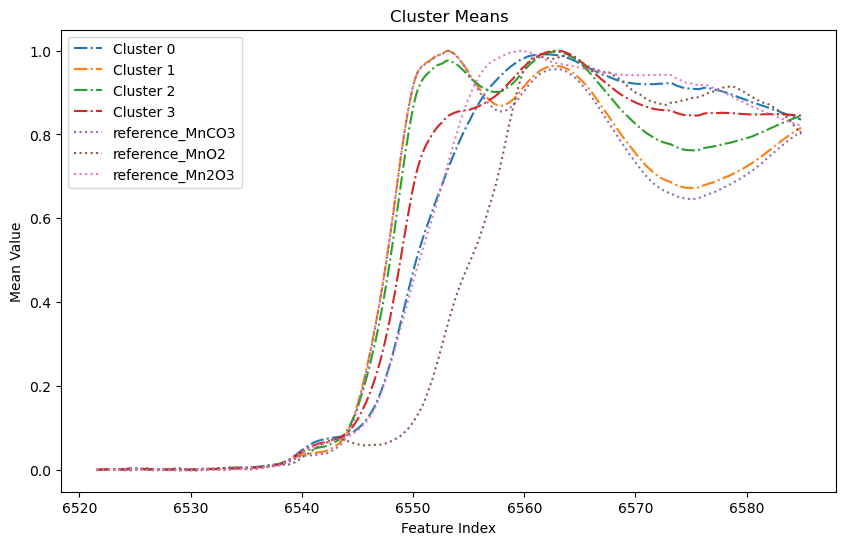

In [11]:
# 计算每个簇的平均值
unique_labels = np.unique(labels)
cluster_means = []

for label in unique_labels:
    cluster_data = X[:, labels == label]
    cluster_mean = cluster_data.mean(axis=1)
    cluster_means.append(cluster_mean)

cluster_means = np.array(cluster_means)

# 可视化二维图
plt.figure(figsize=(10, 6))

for i, label in enumerate(unique_labels):
    plt.plot(data[:,0], cluster_means[i], linestyle="-.", label=f'Cluster {label}')
plt.plot(data[:,0], data[:,1], linestyle=":", label="reference_MnCO3")
plt.plot(reference_MnO2[:,0], reference_MnO2[:,1], linestyle=":", label="reference_MnO2")
plt.plot(reference_Mn2O3[:,0], reference_Mn2O3[:,1], linestyle=":", label="reference_Mn2O3")
plt.xlabel('Feature Index')
plt.ylabel('Mean Value')
plt.title('Cluster Means')
plt.legend()
plt.show()

In [12]:
print(cluster_means.shape)

(4, 360)


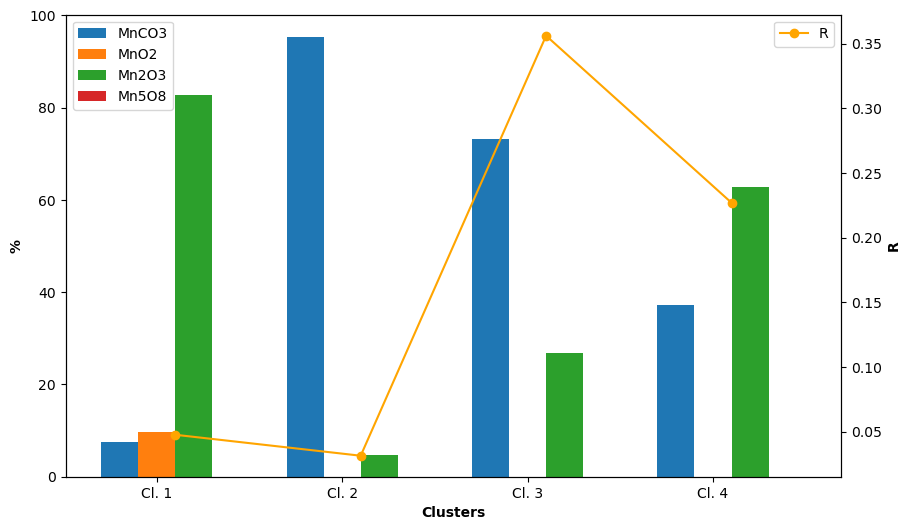

In [13]:
import numpy as np
from scipy.optimize import least_squares

def ls_linear_combination_fit(data, references):
    """
    对数据进行最小二乘线性组合拟合
    data: numpy array, shape (n_points,)
    references: list of numpy arrays, each with shape (n_points,)
    
    返回：拟合系数
    """
    def residuals(coeffs, data, references):
        fit = sum(c * ref for c, ref in zip(coeffs, references))
        # 增加惩罚项，使得系数之和趋近于1
        penalty = 1e3 * (np.sum(coeffs) - 1)  # 调整惩罚项权重
        return np.append(data - fit, penalty)
    
    initial_guess = np.ones(len(references)) / len(references)  # 初始猜测
    bounds = (0, 1)  # 约束条件：所有系数在 [0, 1] 范围内
    result = least_squares(residuals, initial_guess, bounds=bounds, args=(data, references))
    
    # 计算残差平方和（RSS）
    fit = sum(c * ref for c, ref in zip(result.x, references))
    rss = np.sum((data - fit) ** 2)
    
    return result.x, rss

# 示例参考谱列表
references = [reference_MnCO3[:,1], reference_MnO2[:,1], reference_Mn2O3[:,1], reference_Mn5O8[:,1]]

n_clusters = len(cluster_means)

# 可视化每个聚类的拟合结果
# 计算每个聚类的拟合系数
coefficients = []
rss_values = []
for i in range(n_clusters):
    coeffs, rss = ls_linear_combination_fit(cluster_means[i], references)
    coefficients.append(coeffs)
    rss_values.append(rss)

# 转换为 NumPy 数组以便于绘图
coefficients = np.array(coefficients)
component_names = ['MnCO3', 'MnO2', 'Mn2O3', 'Mn5O8']
R_values = np.array(rss_values)  # 使用残差平方和作为 R 值

# 可视化
fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.2
r = np.arange(n_clusters)

# 绘制每个成分的百分比柱状图
for i in range(len(component_names)):
    ax1.bar(r + i * bar_width, coefficients[:, i] * 100, width=bar_width, label=component_names[i])

# 设置 x 轴标签和刻度
ax1.set_xlabel('Clusters', fontweight='bold')
ax1.set_ylabel('%', fontweight='bold')
ax1.set_xticks([r + bar_width for r in range(len(cluster_means))])
ax1.set_xticklabels([f'Cl. {i+1}' for i in range(n_clusters)])

# 创建第二个 y 轴
ax2 = ax1.twinx()
ax2.plot(r + bar_width * (len(component_names) - 1) / 2, R_values, color='orange', marker='o', label='R')

# 设置第二个 y 轴标签
ax2.set_ylabel('R', fontweight='bold')

# 显示图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 显示图表
plt.show()

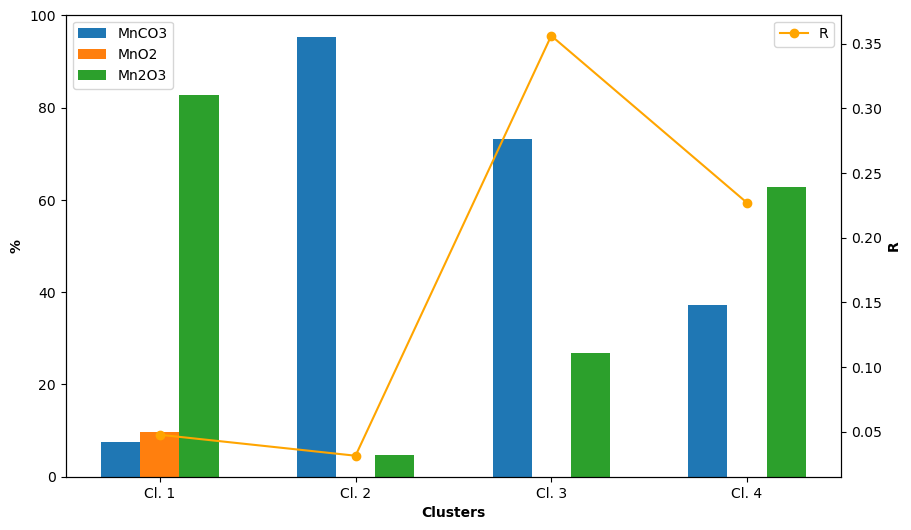

In [14]:
import numpy as np
from scipy.optimize import least_squares

def ls_linear_combination_fit(data, references):
    """
    对数据进行最小二乘线性组合拟合
    data: numpy array, shape (n_points,)
    references: list of numpy arrays, each with shape (n_points,)
    
    返回：拟合系数
    """
    def residuals(coeffs, data, references):
        fit = sum(c * ref for c, ref in zip(coeffs, references))
        # 增加惩罚项，使得系数之和趋近于1
        penalty = 1e3 * (np.sum(coeffs) - 1)  # 调整惩罚项权重
        return np.append(data - fit, penalty)
    
    initial_guess = np.ones(len(references)) / len(references)  # 初始猜测
    bounds = (0, 1)  # 约束条件：所有系数在 [0, 1] 范围内
    result = least_squares(residuals, initial_guess, bounds=bounds, args=(data, references))
    
    # 计算残差平方和（RSS）
    fit = sum(c * ref for c, ref in zip(result.x, references))
    rss = np.sum((data - fit) ** 2)
    
    return result.x, rss

# 示例参考谱列表
references = [reference_MnCO3[:,1], reference_MnO2[:,1], reference_Mn2O3[:,1]]

n_clusters = len(cluster_means)

# 可视化每个聚类的拟合结果
# 计算每个聚类的拟合系数
coefficients = []
rss_values = []
for i in range(n_clusters):
    coeffs, rss = ls_linear_combination_fit(cluster_means[i], references)
    coefficients.append(coeffs)
    rss_values.append(rss)

# 转换为 NumPy 数组以便于绘图
coefficients = np.array(coefficients)
component_names = ['MnCO3', 'MnO2', 'Mn2O3']
R_values = np.array(rss_values)  # 使用残差平方和作为 R 值

# 可视化
fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.2
r = np.arange(n_clusters)

# 绘制每个成分的百分比柱状图
for i in range(len(component_names)):
    ax1.bar(r + i * bar_width, coefficients[:, i] * 100, width=bar_width, label=component_names[i])

# 设置 x 轴标签和刻度
ax1.set_xlabel('Clusters', fontweight='bold')
ax1.set_ylabel('%', fontweight='bold')
ax1.set_xticks([r + bar_width for r in range(len(cluster_means))])
ax1.set_xticklabels([f'Cl. {i+1}' for i in range(n_clusters)])

# 创建第二个 y 轴
ax2 = ax1.twinx()
ax2.plot(r + bar_width * (len(component_names) - 1) / 2, R_values, color='orange', marker='o', label='R')

# 设置第二个 y 轴标签
ax2.set_ylabel('R', fontweight='bold')

# 显示图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 显示图表
plt.show()